In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_train_data=np.load('/content/drive/MyDrive/mnist.npz (Unzipped Files)/x_train.npy')
y_train_data=np.load('/content/drive/MyDrive/mnist.npz (Unzipped Files)/y_train.npy')
x_test_data=np.load('/content/drive/MyDrive/mnist.npz (Unzipped Files)/x_test.npy')
y_test_data=np.load('/content/drive/MyDrive/mnist.npz (Unzipped Files)/y_test.npy')

In [3]:
x_train_data_vector=x_train_data.reshape(x_train_data.shape[0],-1)
x_test_data_vector=x_test_data.reshape(x_test_data.shape[0],-1)
# print(x_train_data_vector)
print(x_train_data_vector.shape)
print(x_test_data_vector.shape)

(60000, 784)
(10000, 784)


In [4]:
train_x=[]
val_x=[]
train_y=[]
val_y=[]
counter={i: 0 for i in range(2)}
test_x=[]
test_y=[]

# testclass0 = x_test[y_test == 0]
# testclass1 = x_test[y_test == 1]
# print(testclass0.shape, testclass1.shape)

# counter_test={i: 0 for i in range(2)}
for i in range(x_test_data_vector.shape[0]):
  if y_test_data[i]==1:
    test_x.append(x_test_data_vector[i])
    test_y.append(y_test_data[i])
  elif y_test_data[i]==0:
    test_x.append(x_test_data_vector[i])
    test_y.append(y_test_data[i])


for i in range(x_train_data_vector.shape[0]):
  if y_train_data[i]==1:
    if(counter[y_train_data[i]]<1000):
      val_x.append(x_train_data_vector[i])
      val_y.append(y_train_data[i])
      counter[y_train_data[i]]+=1
    else:
      train_x.append(x_train_data_vector[i])
      train_y.append(y_train_data[i])
  elif y_train_data[i]==0:
    if(counter[y_train_data[i]]<1000):
      val_x.append(x_train_data_vector[i])
      val_y.append(y_train_data[i])
      counter[y_train_data[i]]+=1
    else:
      train_x.append(x_train_data_vector[i])
      train_y.append(y_train_data[i])


train_x=np.array(train_x)
test_x=np.array(test_x)
print(test_x.shape)
print(train_x)
val_x=np.array(val_x)
print(train_x.shape)
print(val_x.shape)

(2115, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10665, 784)
(2000, 784)


In [5]:
# train_x=data_reg.copy()
# val_x=data_val_reg.copy()
# train_y=lab_reg.copy()
# val_y=lab_val_reg.copy()
train_x=train_x.T
val_x=val_x.T
# x_test_data_vector=x_test_data_vector.T
test_x=test_x.T

mean=np.mean(train_x, axis=1, keepdims=True)
print(mean.shape)
#Train
centralised_train=train_x-mean
#VAL
centralised_val=val_x-mean
#TESt
centralised_test=test_x-mean

print(centralised_train.shape)

(784, 1)
(784, 10665)


In [6]:
Covariance_matrix=(1/(centralised_train.shape[1]-1))*np.dot(centralised_train, centralised_train.T)
eigen_values,eigen_vectors=np.linalg.eigh(Covariance_matrix)
# print(eigen_values)
eigens=[]
eigen_vectors=eigen_vectors.T
for i in range (len(eigen_values)):
  eigens.append((eigen_values[i],eigen_vectors[i]))
sorted_keys=sorted(eigens, key=lambda x: x[0])[::-1]
print(sorted_keys[0][0])
U=[]
print(eigen_values)
for i,j in sorted_keys:
  U.append(j)
U=np.array(U)
Up=U[:5]
# print(Up)

# sorted_indices = np.argsort(eigen_values)[::-1]
# sorted_eigen_values = eigen_values[sorted_indices]
# print(sorted_eigen_values)

# U=sorted_eigen_vectors= eigen_vectors[:, sorted_indices]
# sorted_means = mean[sorted_indices]

1022953.1111329605
[-4.07856864e-11 -3.32896886e-11 -1.83595497e-11 -1.80305840e-11
 -1.40692098e-11 -1.02529848e-11 -5.85763857e-12 -5.47114642e-12
 -3.65353603e-12 -2.89404641e-12 -2.56460706e-12 -2.19378332e-12
 -1.69474455e-12 -1.37492394e-12 -1.19288708e-12 -1.03821875e-12
 -9.07264897e-13 -7.01031490e-13 -5.65313731e-13 -5.07358959e-13
 -3.83786501e-13 -3.60472799e-13 -2.59717723e-13 -2.34743196e-13
 -2.24035024e-13 -1.65966948e-13 -1.55050443e-13 -1.10090059e-13
 -9.84353711e-14 -9.65694702e-14 -8.17227588e-14 -6.62104738e-14
 -5.02526186e-14 -4.26346183e-14 -3.95120195e-14 -3.83404610e-14
 -3.75147743e-14 -3.51677220e-14 -2.91602090e-14 -2.74389195e-14
 -2.44042700e-14 -2.07910260e-14 -1.86781554e-14 -1.37554622e-14
 -1.03834327e-14 -9.02469885e-15 -5.63737306e-15 -4.52963921e-15
 -2.51028062e-15 -1.91701397e-15 -1.51362326e-15 -1.29703083e-15
 -9.24490526e-16 -5.24995771e-16 -1.13048830e-28 -4.04626466e-29
 -1.39323171e-29 -8.97077186e-30 -4.97342293e-30 -2.35481821e-30
 -7.11

In [7]:
Yp=np.dot(Up,train_x)
Yp_val=np.dot(Up,val_x)
Yp_test=np.dot(Up,test_x)

# Yp_test=np.dot(Up,train_x)

In [8]:
#Precomputation:-- 5 because PCA is done with p=5
uni_srt_x={i:[] for i in range(5)}
mid_pts={i:[] for i in range(5)}
sorted_indices = {i: [] for i in range(5)}
temp_labels=train_y.copy()
tree_labels=train_y.copy()
complete_tree=train_y.copy()

for p in range(5):
  uni_srt_x[p]=np.sort(np.unique(Yp[p]))
  print(uni_srt_x[p])
  mid_pts[p]=(uni_srt_x[p][:-1] + uni_srt_x[p][1:])/2
  sorted_indices[p] = np.argsort(Yp[p][:])

print(uni_srt_x)
print(mid_pts)
print(sorted_indices)
print(Yp[0][sorted_indices[0][0]])

[-2965.58795097 -2961.96163277 -2924.90835665 ...   494.21703916
   503.71373092   505.14446758]
[-1810.26253763 -1790.59589064 -1677.68589865 ...   704.71605857
   720.2049464    732.77062017]
[-1150.05824266 -1131.49194412 -1126.69457101 ...  1531.795588
  1544.83313621  1546.46389396]
[-1241.68594073 -1240.53204766 -1218.24847119 ...  1360.2894025
  1381.20759598  1413.22253534]
[ -43.16667033  -30.01373328  -25.04327236 ... 2071.06374202 2075.49705981
 2269.81304672]
{0: array([-2965.58795097, -2961.96163277, -2924.90835665, ...,
         494.21703916,   503.71373092,   505.14446758]), 1: array([-1810.26253763, -1790.59589064, -1677.68589865, ...,
         704.71605857,   720.2049464 ,   732.77062017]), 2: array([-1150.05824266, -1131.49194412, -1126.69457101, ...,
        1531.795588  ,  1544.83313621,  1546.46389396]), 3: array([-1241.68594073, -1240.53204766, -1218.24847119, ...,
        1360.2894025 ,  1381.20759598,  1413.22253534]), 4: array([ -43.16667033,  -30.01373328,  -2

In [9]:
meta_data=[]
def decision_tree(data_x,label_y):
  # print(label_y)
  optimal_ssr=np.inf
  optimal_p=0
  optimal_i=0
  optimal_hl=0
  optimal_hr=0
  for p in range(5):
    # print(p)
    lc=0
    rc=len(uni_srt_x[p])
    left_sum=0
    right_sum=0

    for j in sorted_indices[p]:
      right_sum+=(label_y[j])

    prevl_ssr=0
    prevr_ssr=0
    for i in range(len(mid_pts[p])):
      # print(left_sum,label_y[sorted_indices[p][i]],prevl_ssr)
      ssr_l=0
      ssr_r=0

      if i==0:
        lc+=1
        rc-=1
        left_sum+=label_y[sorted_indices[p][i]]
        right_sum-=label_y[sorted_indices[p][i]]
        h_l=left_sum/lc
        h_r=right_sum/rc

        for k in sorted_indices[p][:i+1]:
          ssr_l+=(label_y[k]-h_l)**2

        for k in sorted_indices[p][i+1:]:
          ssr_r+=(label_y[k]-h_r)**2

        ssr=ssr_l+ssr_r
        prevl_ssr=ssr_l
        prevr_ssr=ssr_r

      else:
        v0=label_y[sorted_indices[p][i]]
        L0=(left_sum**2)/lc
        L1=lc*(((left_sum+v0)/(lc+1))**2) + (v0 - (left_sum+v0)/(lc+1))**2

        l_factor=(L1-L0) + 2*(left_sum/lc - (left_sum+v0)/(lc+1))*left_sum

        R0=(rc-1)*((right_sum+v0)/rc)**2 + (v0 - (right_sum+v0)/rc)**2
        R1=(right_sum**2)/(rc-1)

        r_factor=(R1-R0) + 2*(((right_sum + v0)/rc) - (right_sum/(rc-1)))*(right_sum-v0) #Or maybe remove the v0 from this, lets see!!

        lc+=1
        rc-=1
        left_sum+=label_y[sorted_indices[p][i]]
        right_sum-=label_y[sorted_indices[p][i]]
        h_l=left_sum/lc
        h_r=right_sum/rc

        ssr_l=prevl_ssr + l_factor
        ssr_r=prevr_ssr + r_factor

        ssr=ssr_l+ssr_r

        prevl_ssr=ssr_l
        prevr_ssr=ssr_r


      if (ssr<optimal_ssr):
        optimal_ssr=ssr
        optimal_p=p
        optimal_i=i
        optimal_hl=h_l
        optimal_hr=h_r
        optimal_left_sum=left_sum
        optimal_right_sum=right_sum
        opt_lc=lc
        opt_rc=rc


  for idx in sorted_indices[optimal_p][:optimal_i+1]:
    label_y[idx]-=0.01*optimal_hl
  for idx in sorted_indices[optimal_p][optimal_i+1:]:
    label_y[idx]-=0.01*optimal_hr
  # print(optimal_left_sum, optimal_right_sum,opt_lc,opt_rc)
  meta_data.append([optimal_p, optimal_i, 0.01*optimal_hl, 0.01*optimal_hr, optimal_ssr])
  # print(meta_data[-1])

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
NUM=300
for i in range(NUM):
  print(i+1)
  decision_tree(Yp,tree_labels)
  # print(tree_labels)
print(meta_data)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# print(data_val_reg.shape,len(lab_val_reg))
# mses=[0,]*iter
# for i in range(len(lab_val_reg)):
#   g=lab_val_reg[i]
#   for j in range(iter):
#     l_avg,r_avg,dim,cut=splits[j][1:]
#     # print(dim,cut,i,len)
#     g-=l_avg if data_val_reg[i][dim]<=midpts[dim][cut] else r_avg
#     mses[j]+=g**2

# for i in range(iter):
#   mses[i]/=len(lab_val_reg)
# plt.plot(np.array([i+1 for i in range(iter)]),np.array(mses))

[[0, 4916, 4.47427293064877e-05, 0.009951287404314543, 49.765171381329424], [0, 4916, 4.4295302013422783e-05, 0.009851774530270804, 49.7651713815672], [0, 4916, 4.385234899328854e-05, 0.009753256784970082, 49.76517138037197], [0, 4916, 4.341382550335567e-05, 0.009655724217116614, 49.765171381964926], [0, 4916, 4.297968724832202e-05, 0.00955916697494535, 49.765171381519], [0, 4895, 2.2316964990919706e-05, 0.009446452557574661, 49.70190396544157], [0, 4916, 4.1924225612152625e-05, 0.00936911077962385, 49.580316777046264], [0, 4895, 2.1674553084889316e-05, 0.009258636447374234, 49.52012500229331], [0, 4942, 6.495947741606511e-05, 0.009203583652074604, 49.369903580554706], [0, 4895, 2.080821277987942e-05, 0.009074758769410564, 49.13148307221869], [0, 4942, 6.324091506769314e-05, 0.009020800227861989, 48.98805007393499], [0, 4895, 1.9967721501403863e-05, 0.008894532951133474, 48.758097877727074], [0, 4942, 6.156499992232866e-05, 0.00884164689606755, 48.621169170722325], [0, 4895, 1.91523942

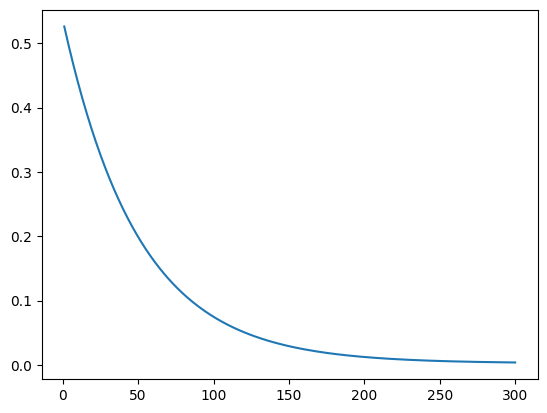

In [13]:
MSE = [0,]*NUM
print(meta_data)
for i in range(len(test_y)):
  temp=test_y[i]
  for j in range(NUM):
    left_avg= meta_data[j][2]
    right_avg= meta_data[j][3]
    dimension=  meta_data[j][0]
    cut_point= meta_data[j][1]
    temp-= left_avg if Yp_test[dimension][i] <= mid_pts[dimension][cut_point] else right_avg
    MSE[j]+=temp**2

for i in range(NUM):
  MSE[i]/=len(test_y)
print(MSE)
plt.plot(np.array([i+1 for i in range(NUM)]), np.array(MSE))


[[0, 4916, 4.47427293064877e-05, 0.009951287404314543, 49.765171381329424], [0, 4916, 4.4295302013422783e-05, 0.009851774530270804, 49.7651713815672], [0, 4916, 4.385234899328854e-05, 0.009753256784970082, 49.76517138037197], [0, 4916, 4.341382550335567e-05, 0.009655724217116614, 49.765171381964926], [0, 4916, 4.297968724832202e-05, 0.00955916697494535, 49.765171381519], [0, 4895, 2.2316964990919706e-05, 0.009446452557574661, 49.70190396544157], [0, 4916, 4.1924225612152625e-05, 0.00936911077962385, 49.580316777046264], [0, 4895, 2.1674553084889316e-05, 0.009258636447374234, 49.52012500229331], [0, 4942, 6.495947741606511e-05, 0.009203583652074604, 49.369903580554706], [0, 4895, 2.080821277987942e-05, 0.009074758769410564, 49.13148307221869], [0, 4942, 6.324091506769314e-05, 0.009020800227861989, 48.98805007393499], [0, 4895, 1.9967721501403863e-05, 0.008894532951133474, 48.758097877727074], [0, 4942, 6.156499992232866e-05, 0.00884164689606755, 48.621169170722325], [0, 4895, 1.91523942

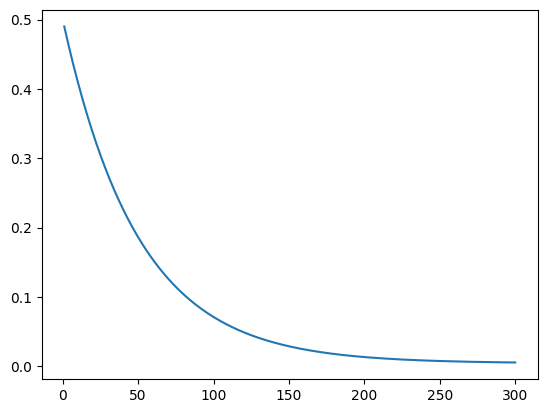

In [14]:

MSE = [0,]*NUM
print(meta_data)
for i in range(len(val_y)):
  temp=val_y[i]
  for j in range(NUM):
    left_avg= meta_data[j][2]
    right_avg= meta_data[j][3]
    dimension=  meta_data[j][0]
    cut_point= meta_data[j][1]
    temp-= left_avg if Yp_val[dimension][i] <= mid_pts[dimension][cut_point] else right_avg
    MSE[j]+=temp**2

for i in range(NUM):
  MSE[i]/=len(val_y)
print(MSE)
plt.plot(np.array([i+1 for i in range(NUM)]), np.array(MSE))


# num_trees = []
# MSE=[]
# preds = np.zeros(len(val_y))
# for i in range(300):
#     print("MSE for tree", i+1)
#     num_trees.append(i+1)
#     mse = 0
#     for j in range(len(val_y)):
#         if Yp_val[meta_data[i][0]][j] <= mid_pts[meta_data[i][0]][meta_data[i][1]]:
#             preds[j] += meta_data[i][2]
#         else:
#             preds[j] += meta_data[i][3]
#         mse += (val_y[j] - preds[j]) ** 2
#     mse /= len(val_y)
#     MSE.append(mse)
#     print(mse)

# print("MSE values:", MSE)
# print("Predictions:", preds)
